In [9]:
# Run this cell only if these packages are not already installed
!pip install opencv-python numpy scikit-learn

In [10]:
import zipfile
import os

train_zip_path = 'train.zip'
test_zip_path = 'test.zip'
extracted_train_folder = 'train_images'
extracted_test_folder = 'test_images'

os.makedirs(extracted_train_folder, exist_ok=True)
os.makedirs(extracted_test_folder, exist_ok=True)

# Extract train.zip
try:
    with zipfile.ZipFile(train_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_train_folder)
    print(f"'{train_zip_path}' extracted to '{extracted_train_folder}'")
except FileNotFoundError:
    print(f"Error: '{train_zip_path}' not found.")
except Exception as e:
    print(f"Error extracting '{train_zip_path}': {e}")

# Extract test.zip
try:
    with zipfile.ZipFile(test_zip_path, 'r') as zip_ref:
        zip_ref.extractall(extracted_test_folder)
    print(f"'{test_zip_path}' extracted to '{extracted_test_folder}'")
except FileNotFoundError:
    print(f"Error: '{test_zip_path}' not found.")
except Exception as e:
    print(f"Error extracting '{test_zip_path}': {e}")


'train.zip' extracted to 'train_images'
'test.zip' extracted to 'test_images'


In [11]:
import os
import cv2
import numpy as np

image_size = (100, 100)
X_train, y_train = [], []
X_test, y_test = [], []

def load_images_from_folder(folder_path):
    image_data = []
    labels = []
    if not os.path.exists(folder_path):
        print(f"Folder '{folder_path}' not found.")
        return image_data, labels

    for filename in os.listdir(folder_path):
        if filename.lower().endswith((".jpg", ".png", ".jpeg")):
            img_path = os.path.join(folder_path, filename)
            img = cv2.imread(img_path)
            if img is not None:
                img = cv2.resize(img, image_size)
                img = img.flatten()
                image_data.append(img)
                if "cat" in filename.lower():
                    labels.append(0)
                elif "dog" in filename.lower():
                    labels.append(1)
    return image_data, labels

X_train, y_train = load_images_from_folder(extracted_train_folder)
X_test, y_test = load_images_from_folder(extracted_test_folder)

X_train = np.array(X_train)
y_train = np.array(y_train)
X_test = np.array(X_test)
y_test = np.array(y_test)

print(f"Training data: {X_train.shape}, Labels: {y_train.shape}")
print(f"Testing data: {X_test.shape}, Labels: {y_test.shape}")


Training data: (78, 30000), Labels: (78,)
Testing data: (50, 30000), Labels: (0,)


In [12]:
from sklearn.svm import SVC

svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train, y_train)

print("SVM model trained successfully.")


SVM model trained successfully.


In [13]:
# Mapping numeric labels to text
label_map = {0: "cat", 1: "dog"}

# Predict on test data
y_pred = svm_model.predict(X_test)

# Print predictions as "number -> text"
print("Predictions on test data:")
for num, label in zip(y_pred, [label_map[p] for p in y_pred]):
    print(f"{num} -> {label}")


Predictions on test data:
0 -> cat
0 -> cat
1 -> dog
1 -> dog
0 -> cat
0 -> cat
1 -> dog
0 -> cat
0 -> cat
0 -> cat
0 -> cat
0 -> cat
0 -> cat
1 -> dog
1 -> dog
0 -> cat
1 -> dog
1 -> dog
1 -> dog
1 -> dog
1 -> dog
0 -> cat
1 -> dog
1 -> dog
0 -> cat
1 -> dog
0 -> cat
1 -> dog
1 -> dog
1 -> dog
0 -> cat
1 -> dog
1 -> dog
1 -> dog
0 -> cat
0 -> cat
1 -> dog
1 -> dog
1 -> dog
1 -> dog
0 -> cat
1 -> dog
1 -> dog
1 -> dog
1 -> dog
0 -> cat
1 -> dog
1 -> dog
0 -> cat
0 -> cat


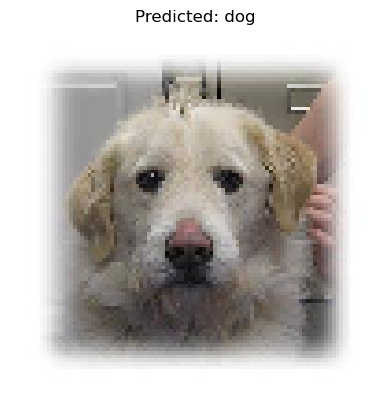

In [8]:
import matplotlib.pyplot as plt
import os
import cv2
import random
example_index = random.randint(0, len(X_test) - 1) 
example_image_data = X_test[example_index]
example_prediction = y_pred_text[example_index]
image_height, image_width = image_size
image_channels = 3 
example_image_reshaped = example_image_data.reshape(image_height, image_width, image_channels)
plt.imshow(cv2.cvtColor(example_image_reshaped, cv2.COLOR_BGR2RGB)) 
plt.title(f"Predicted: {example_prediction}")
plt.axis('off')
plt.show()